# Homework : 4 Machine Learning - 1 (Supervised Methods)

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from utils.multiclassPerceptron import MultiClassPerceptron

In [2]:
# Importing The Bean Datasets Train and Test

# Train Dataset
train_data = pd.read_csv("./datasets/Dry_Bean_train.csv")
print("Train Data -> Bean Dataset: ")
print(train_data.head())
print()

Train Data -> Bean Dataset: 
     Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0   46427    811.657       293.918029       202.246160      1.453269   
1   35857    710.411       261.097189       175.491734      1.487803   
2  171028   1553.271       564.123032       387.736246      1.454914   
3   61736   1006.756       408.994308       193.596049      2.112617   
4  102525   1238.007       478.271451       274.496251      1.742361   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.725612       46974     243.131019  0.683796  0.988355   0.885596   
1      0.740431       36325     213.669255  0.712891  0.987116   0.892821   
2      0.726349      172608     466.647204  0.788962  0.990846   0.890805   
3      0.880876       62339     280.365327  0.827416  0.990327   0.765420   
4      0.818902      103334     361.301653  0.809201  0.992171   0.840608   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  \
0

In [3]:
# Test Dataset
test_data = pd.read_csv("./datasets/Dry_Bean_test.csv")
print("Test Data -> Bean Dataset: ")
print(test_data.head())
print()

Test Data -> Bean Dataset: 
     Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0   38542    724.663       273.728756       179.666585      1.523537   
1   76070   1063.592       413.174391       235.346983      1.755597   
2   50253    872.982       354.074847       181.355633      1.952379   
3   44799   1005.548       362.449644       157.986158      2.294186   
4  180028   1630.826       625.624977       371.440425      1.684321   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.754442       38922     221.524713  0.707063  0.990237   0.922299   
1      0.821917       76858     311.215893  0.777446  0.989747   0.845032   
2      0.858869       50859     252.950799  0.641604  0.988085   0.828631   
3      0.900003       46552     238.830187  0.652523  0.962343   0.556766   
4      0.804678      183263     478.767970  0.674611  0.982348   0.850618   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  \
0 

## Creating an instance for the MultiClassPerceptron class.

In [4]:
mcp = MultiClassPerceptron()

# 2] (a) Run your Multiclass Perceptron algorithm on the Dry Beans dataset.

In [5]:
n_train, X_train, T_train = mcp.generateTrainData(trainData=train_data)

X_train_std = mcp.standardizeTrainData(X_train=X_train)

X_train_augmented = mcp.augmentData(X=X_train_std, n=n_train)
print(f"Shape of Augmented X_train: {X_train_augmented.shape}")


w_vector = mcp.initializeWeights(1)
print(f"Shape of w_vector: {w_vector .shape}")

---------------------------------------------------
TRAIN DATA OF BEAN DATASET: 
  Shape of Input Data: (12249, 17)
  Number of Data Points: 12249
  Number of Input Features: 16
  Number of Target Classes: 7
---------------------------------------------------
Shape of Augmented X_train: (12249, 17)
Shape of w_vector: (17, 7)


## Printing the first data point of X_train, X_train_std and X_train_augmented

In [6]:
X_train[0]

array([4.64270000e+04, 8.11657000e+02, 2.93918029e+02, 2.02246160e+02,
       1.45326877e+00, 7.25612114e-01, 4.69740000e+04, 2.43131019e+02,
       6.83795805e-01, 9.88355260e-01, 8.85595515e-01, 8.27206890e-01,
       6.33075600e-03, 1.82848700e-03, 6.84271239e-01, 9.94430025e-01])

In [7]:
X_train_std[0]

array([-2.25584343e-01, -2.03067042e-01, -3.05504987e-01, -6.36055783e-04,
       -5.27050635e-01, -2.74808787e-01, -2.27982918e-01, -1.67481972e-01,
       -1.34349400e+00,  2.60467568e-01,  2.06351130e-01,  4.43231284e-01,
       -2.06824753e-01,  1.88301261e-01,  4.11093274e-01, -1.40586238e-01])

In [8]:
X_train_augmented[0]

array([ 1.00000000e+00, -2.25584343e-01, -2.03067042e-01, -3.05504987e-01,
       -6.36055783e-04, -5.27050635e-01, -2.74808787e-01, -2.27982918e-01,
       -1.67481972e-01, -1.34349400e+00,  2.60467568e-01,  2.06351130e-01,
        4.43231284e-01, -2.06824753e-01,  1.88301261e-01,  4.11093274e-01,
       -1.40586238e-01])

## Perform training using SGD and computing the accuracy on train and test data

In [9]:
optimum_w_vector = mcp.modelTrain_SGD(n_train = n_train, X_train = X_train_augmented, T_train = T_train, w_vector = w_vector, epochs = 100, learn_rate = 1, printFlag = True)

Epoch #1 --> Cost J(W) is: 13537.2513119182
Epoch #2 --> Cost J(W) is: 12201.70504399047
Epoch #3 --> Cost J(W) is: 28558.192456811983
Epoch #4 --> Cost J(W) is: 15094.775776776414
Epoch #5 --> Cost J(W) is: 12804.503454960883
Epoch #6 --> Cost J(W) is: 12394.563897658085
Epoch #7 --> Cost J(W) is: 13225.907857045158
Epoch #8 --> Cost J(W) is: 20557.936690709786
Epoch #9 --> Cost J(W) is: 9349.056030096624
Epoch #10 --> Cost J(W) is: 12153.452927104028
Epoch #11 --> Cost J(W) is: 10213.532461062443
Epoch #12 --> Cost J(W) is: 11230.170606059204
Epoch #13 --> Cost J(W) is: 12494.645768736935
Epoch #14 --> Cost J(W) is: 10238.634154463978
Epoch #15 --> Cost J(W) is: 8981.900965928575
Epoch #16 --> Cost J(W) is: 9933.569082339438
Epoch #17 --> Cost J(W) is: 10596.260780512668
Epoch #18 --> Cost J(W) is: 12283.11723488711
Epoch #19 --> Cost J(W) is: 16845.57532882649
Epoch #20 --> Cost J(W) is: 12089.606129908263
Epoch #21 --> Cost J(W) is: 14700.05420853382
Epoch #22 --> Cost J(W) is: 974

In [10]:
# Results - Accuracy
Y_hat_train = mcp.predict(X=X_train_augmented, w_vector=optimum_w_vector)
accuracyTrain = mcp.calculateAccuracy(T=T_train, Y_hat=Y_hat_train, n=n_train)
print("---------------------------------------------------------------------")
print("Train Accuracy: ",accuracyTrain)
print("---------------------------------------------------------------------")

---------------------------------------------------------------------
Train Accuracy:  88.83174136664216
---------------------------------------------------------------------


## Using Test Data of Bean Dataset and finding the accuracy

In [11]:
n_test, X_test, T_test = mcp.generateTestData(testData=test_data, printFlag=True) 
X_test_std = mcp.standardizeTestData(X_test=X_test)

X_test_augmented = mcp.augmentData(X=X_test_std, n=n_test)
print(f"Shape of Augmented X_test: {X_test_augmented.shape}")


---------------------------------------------------
TEST DATA OF BEAN DATASET: 
  Shape of Input Data: (1362, 17)
  Number of Data Points: 1362
  Number of Input Features: 16
  Number of Target Classes: 7
---------------------------------------------------
Shape of Augmented X_test: (1362, 17)


In [12]:
# Results - Accuracy
Y_hat_test = mcp.predict(X=X_test_augmented, w_vector=optimum_w_vector)
accuracyTest = mcp.calculateAccuracy(T=T_test, Y_hat=Y_hat_test, n=n_test)
print("---------------------------------------------------------------------")
print("Test Accuracy: ",accuracyTest)
print("---------------------------------------------------------------------")

---------------------------------------------------------------------
Test Accuracy:  88.91336270190897
---------------------------------------------------------------------


## Printing the weight vectors and the Magnitude values

In [13]:
mcp.print_weights(optimum_w_vector)

########################################################################
w_vector[1]
Magnitude : 67.28352317800257
[ 15.         -15.13608669  28.48012332   3.17815208 -25.23933715
  10.12261028 -22.01258007 -15.8372422   -7.45438017  -0.2469686
   2.1873817   -3.206283    -9.93791016 -34.57211396  16.05876149
  -4.19784031  11.69177159]
########################################################################
w_vector[2]
Magnitude : 74.88295252634417
[ 2.50000000e+01  3.31718391e-02  3.58912557e+01 -1.48050717e+01
  6.76681603e+00 -1.03101264e+01  2.87614307e+01 -5.73802638e+00
 -2.40345981e+00 -1.22744942e+00  1.29542406e+00  5.80563798e+00
  1.38799570e+01  4.42458128e+01  1.48491892e+01  6.94807312e+00
 -1.03132839e+00]
########################################################################
w_vector[3]
Magnitude : 114.49572747739106
[-66.          48.93969992   9.80786831   7.96798295  19.71178705
  -8.93416196  -2.19807305  49.14535158  13.76581955   4.84029897
   0.70532384  21.8

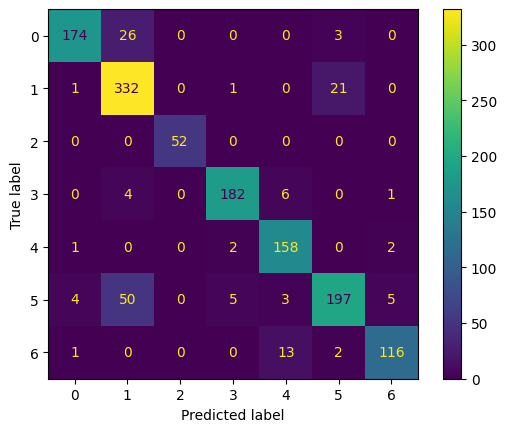

<Figure size 640x480 with 0 Axes>

In [14]:
# Results - Confusion matrix on test set
cm = confusion_matrix(T_test,Y_hat_test)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()
plt.figure()
plt.show()

## 1] (b) Repeat part (a) 10 times. Report only the mean and standard deviation of: classification accuracies, weight vector norms and confusion matrix.

In [15]:
accuracyTrainHistory = []
accuracyTestHistory = []
weightNormHistory = np.zeros((10,7))  
cmHistory = np.zeros((10,7,7))          

for i in range(10):
    final_w_vector = mcp.modelTrain_SGD(n_train = n_train, X_train = X_train_augmented, T_train = T_train, w_vector = w_vector, epochs = 100, learn_rate = 1, printFlag = False)
    Y_hat_train = mcp.predict(X_train_augmented, final_w_vector)
    Y_hat_test = mcp.predict(X_test_augmented, final_w_vector)
    cm = confusion_matrix(T_test,Y_hat_test)
     
    accuracyTrainHistory.append(mcp.calculateAccuracy(T_train,Y_hat_train, n_train))
    accuracyTestHistory.append(mcp.calculateAccuracy(T=T_test, Y_hat=Y_hat_test, n=n_test))
    weightNormHistory[i] = np.linalg.norm(final_w_vector, axis=0)
    cmHistory[i] = cm

In [16]:
mean_accuracy_train = np.mean(accuracyTrainHistory)
std_accuracy_train = np.std(accuracyTrainHistory)

mean_accuracy_test = np.mean(accuracyTestHistory)
std_accuracy_test = np.std(accuracyTestHistory)

mean_weight_norm  = np.mean(weightNormHistory,axis=0)
std_weight_norm   = np.std(weightNormHistory,axis=0)

mean_cm = np.mean(cmHistory,axis=0)
std_cm = np.std(cmHistory,axis=0)

In [17]:
# Results - Mean and std of accuracies
print("---------------------------------------------------------------------")
print("Train accuracy Mean: ",mean_accuracy_train)
print("Train accuracy Std : ",std_accuracy_train)
print("---------------------------------------------------------------------")
print("Test accuracy Mean: ",mean_accuracy_test)
print("Test accuracy Std : ",std_accuracy_test)
print("---------------------------------------------------------------------")

print()

print("---------------------------------------------------------------------")
print("Weight norm Mean: ")
print(mean_weight_norm)
print("Weight norm std: ")
print(std_weight_norm)
print("---------------------------------------------------------------------")

---------------------------------------------------------------------
Train accuracy Mean:  89.6367050371459
Train accuracy Std :  1.3544314619088604
---------------------------------------------------------------------
Test accuracy Mean:  89.00881057268722
Test accuracy Std :  1.3167025130202685
---------------------------------------------------------------------

---------------------------------------------------------------------
Weight norm Mean: 
[155.84424782 160.58011073 158.94500551 270.83877414 224.02711744
 293.10558535 221.84036302]
Weight norm std: 
[36.87276261 34.20940612 15.95343935 77.45832833 66.04854735 66.84588244
 54.82752154]
---------------------------------------------------------------------


## Confusion Matrix for cm_mean and Confusion Matrix for cm_std

Confusion Matrix for cm_mean: 


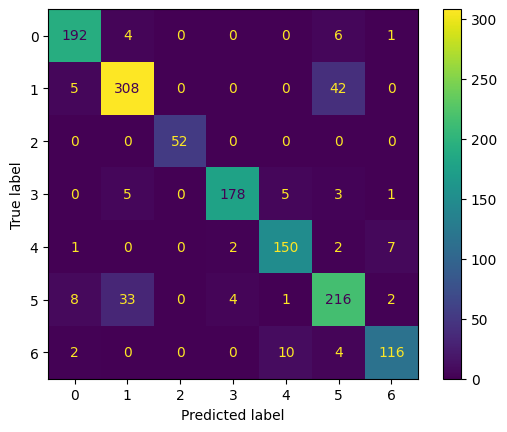

<Figure size 640x480 with 0 Axes>

In [18]:
# Results - Mean and Std of Confusion Matrix
print("Confusion Matrix for cm_mean: ")
mean_cm = np.round(mean_cm).astype(int)
disp = ConfusionMatrixDisplay(confusion_matrix=mean_cm)
disp.plot()
plt.figure()
plt.show()



Confusion Matrix for cm_std: 


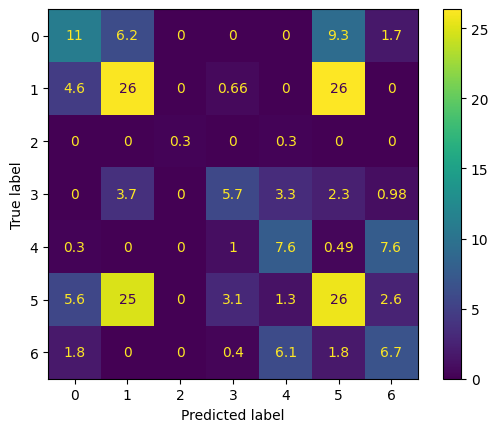

<Figure size 640x480 with 0 Axes>

In [19]:
print("Confusion Matrix for cm_std: ")
# std_cm = np.round(std_cm).astype(int)
disp = ConfusionMatrixDisplay(confusion_matrix=std_cm)
disp.plot()
plt.figure()
plt.show()